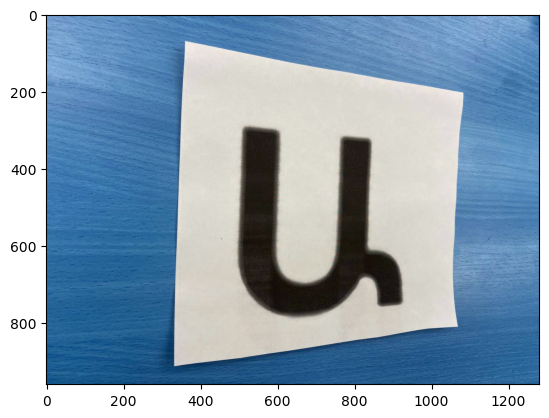

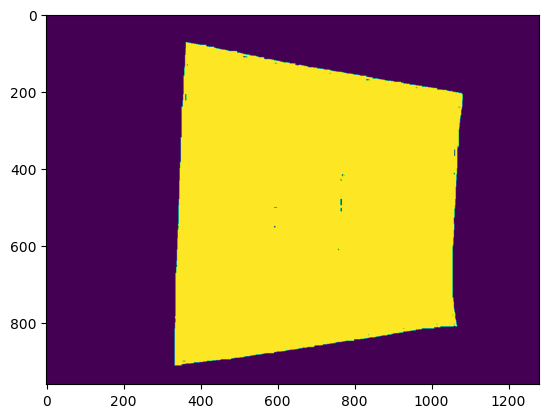

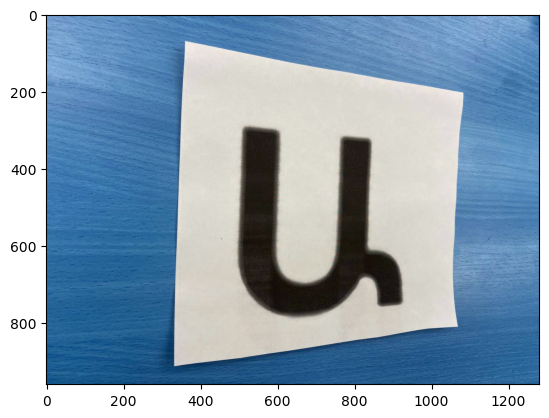

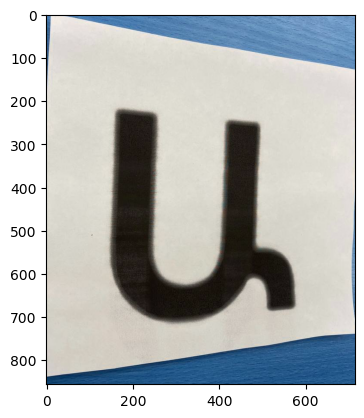

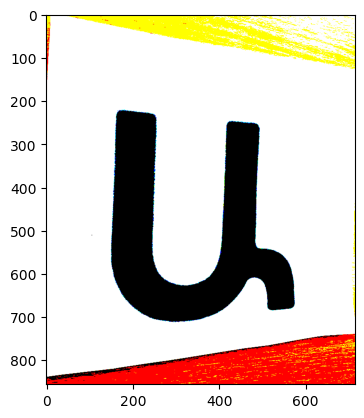

In [91]:
#подключение необходимых библиотек для работы с изображением 
import cv2  
import numpy as np
import matplotlib.pyplot as plt


hsv_min = np.array((30, 0, 0), np.uint8)
hsv_max = np.array((255, 255, 255), np.uint8)

fn = '1.jpg' # имя файла, который будем анализировать
img = cv2.imread(fn)

plt.imshow(img)
plt.show()

hsv = cv2.cvtColor( img, cv2.COLOR_BGR2HSV ) # меняем цветовую модель с BGR на HSV
thresh = cv2.inRange( hsv, hsv_min, hsv_max ) # применяем цветовой фильтр
plt.imshow(thresh)
plt.show()
contours0, hierarchy = cv2.findContours(thresh.copy(), cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)
# перебираем все найденные контуры в цикле
for cnt in contours0:
    rect = cv2.minAreaRect(cnt) # пытаемся вписать прямоугольник
    box = cv2.boxPoints(rect) # поиск четырех вершин прямоугольника
    box = np.intp(box) # округление координат
    area = int(rect[1][0]*rect[1][1]) # вычисление площади
    if area > 10000:
        big_box = box
    #cv2.drawContours(img,[box],0,(255,0,0),2)
    
plt.imshow(img)
plt.show()

#crop = img[box[1][1]:box[3][1], box[1][0]:box[3][0]]
crop = img[big_box[1][1]:big_box[3][1], big_box[1][0]:big_box[3][0]]
plt.imshow(crop)
plt.show()

crop = cv2.cvtColor(crop, cv2.COLOR_RGB2BGR)
ret, threshold_image = cv2.threshold(crop, 100, 255, 0)
plt.imshow(threshold_image)
plt.show()

In [90]:
big_box



array([[ 330,  910],
       [ 350,   72],
       [1084,   90],
       [1064,  928]], dtype=int32)